In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("modified_synthetic_economic_data.csv")

In [5]:
df

,year,month,interest_rate,unemployment_rate,index_price
0,1924,1,3.50,5.19,534.714897
1,1925,1,2.86,4.36,424.911412
2,1926,1,3.65,5.18,582.253910
3,1927,1,4.52,5.81,784.797318
4,1928,1,2.77,5.07,321.169866
...,...,...,...,...,...
1195,2019,12,3.44,2.83,767.901200
1196,2020,12,2.98,3.62,541.022220
1197,2021,12,3.55,3.49,731.564473
1198,2022,12,3.22,5.31,435.166468


In [6]:
df.shape

(1200, 5)

In [13]:
df.isnull().sum()

year                 0
month                0
interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

In [17]:
df.head(2)

,year,month,interest_rate,unemployment_rate,index_price
0,1924,1,3.50,5.19,534.714897
1,1925,1,2.86,4.36,424.911412


## Drop Unneccessary columns

In [21]:
df.drop(columns=['year', 'month'], axis=1, inplace=True)

In [23]:
df

,interest_rate,unemployment_rate,index_price
0,3.50,5.19,534.714897
1,2.86,4.36,424.911412
2,3.65,5.18,582.253910
3,4.52,5.81,784.797318
4,2.77,5.07,321.169866
...,...,...,...
1195,3.44,2.83,767.901200
1196,2.98,3.62,541.022220
1197,3.55,3.49,731.564473
1198,3.22,5.31,435.166468


In [27]:
# Check null value
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

C:\Users\mvsha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mvsha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mvsha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


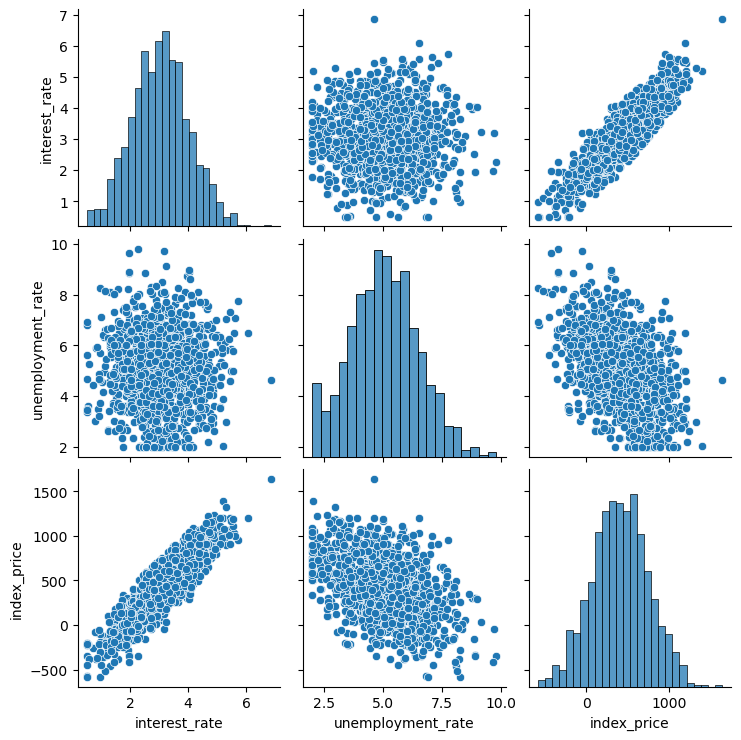

In [31]:
sns.pairplot(df)
plt.show()

In [33]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,0.014553,0.890899
unemployment_rate,0.014553,1.000000,-0.441184
index_price,0.890899,-0.441184,1.000000


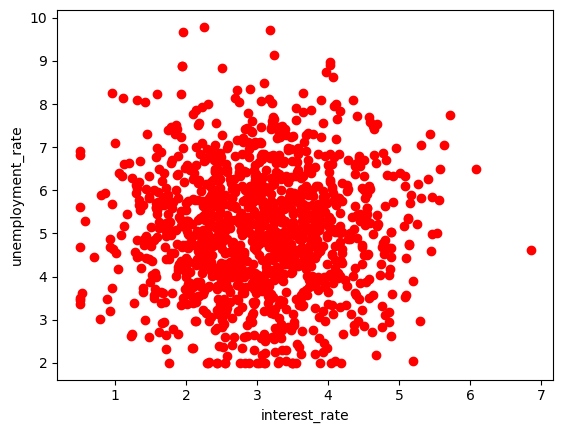

In [37]:
# Visualize the data points

plt.scatter(df['interest_rate'], df['unemployment_rate'], color='r')
plt.xlabel("interest_rate")
plt.ylabel("unemployment_rate")
plt.show()

In [39]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [47]:
X

,interest_rate,unemployment_rate
0,3.50,5.19
1,2.86,4.36
2,3.65,5.18
3,4.52,5.81
4,2.77,5.07
...,...,...
1195,3.44,2.83
1196,2.98,3.62
1197,3.55,3.49
1198,3.22,5.31


In [49]:
y

0       534.714897
1       424.911412
2       582.253910
3       784.797318
4       321.169866
           ...    
1195    767.901200
1196    541.022220
1197    731.564473
1198    435.166468
1199    810.947961
Name: index_price, Length: 1200, dtype: float64

In [51]:
# train test split


from sklearn.model_selection import train_test_split

In [53]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25, random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

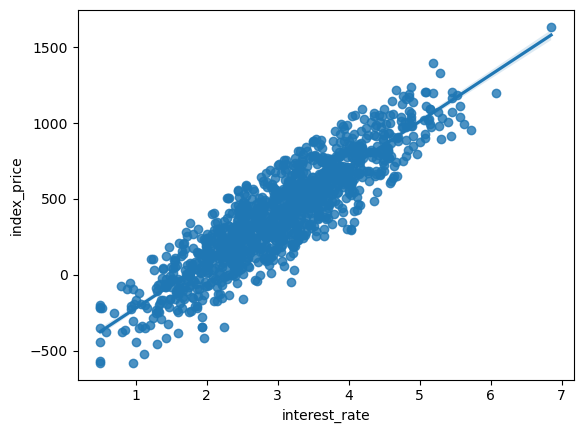

In [60]:
sns.regplot(x=df['interest_rate'], y=df['index_price'])

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

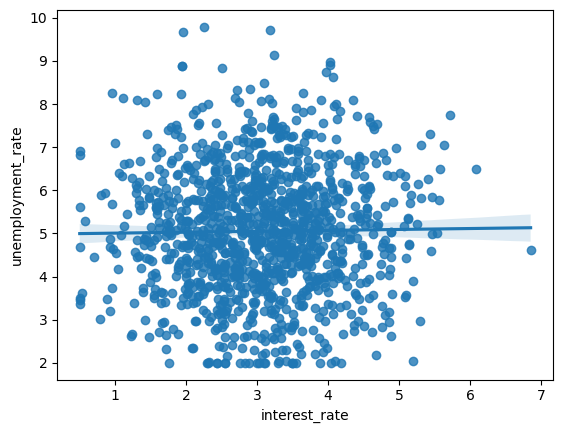

In [62]:
sns.regplot(x=df['interest_rate'], y=df['unemployment_rate'])

In [64]:
from sklearn.preprocessing import StandardScaler

In [66]:
scaler = StandardScaler()

In [72]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [76]:
from sklearn.linear_model import LinearRegression

In [78]:
regression = LinearRegression()

In [80]:
regression.fit(X_train,y_train)

LinearRegression()

In [82]:
from sklearn.model_selection import cross_val_score

In [84]:
cvs = cross_val_score(regression,X_train,y_train, scoring="neg_mean_squared_error", cv=3)

In [86]:
np.mean(cvs)

-0.6794977536162481

In [88]:
y_pred = regression.predict(X_test)

In [90]:
y_pred

array([ 1.72424289e+02,  3.70257283e+02,  1.07727873e+02,  5.42830232e+02,
        5.95818685e+02,  6.32918843e+02,  1.13810310e+03,  3.94060051e+02,
        3.20496146e+02,  3.57722049e+02,  2.29907757e+02,  7.05000485e+01,
        1.37096732e+02,  2.11992169e+02,  5.61322237e+01,  1.62169120e+02,
        4.51102451e+02,  1.74324556e+02,  6.71218383e+02,  7.71684705e+02,
        1.16145967e+02,  6.70840507e+02,  1.61915068e+02,  3.50695479e+02,
        2.91379418e+02,  1.49002599e+02,  9.19633380e+02,  3.85895369e+02,
        2.37824152e+02,  8.91158823e+01,  3.04607211e+02,  9.05070853e+02,
        1.50013684e+02,  5.33715736e+02,  6.79254117e+02,  3.62471117e+02,
        3.77668135e+02,  3.13791304e+02,  4.65029848e+02,  5.03453211e+02,
       -1.23974120e+02,  4.37236966e+02,  1.25009612e+02,  4.36601830e+01,
        3.47341136e+02,  1.88128770e+02,  4.18624335e+02, -8.35228215e+01,
        4.65849433e+02,  8.45435626e+02,  5.91579643e+02,  5.68662856e+02,
        3.07712625e+02,  

In [92]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [94]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

916.2519044815615
24.12717216904681
30.269653193942634


## Assumption

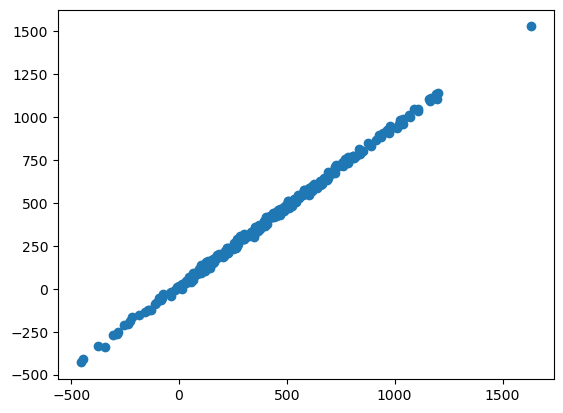

In [99]:
plt.scatter(y_test,y_pred)
plt.show()

In [101]:
residuals = y_test-y_pred

In [103]:
print(residuals)

1178   -13.175548
865      1.693288
101      3.145250
439      9.289620
58      19.544068
          ...    
772     29.027012
494     50.666430
1027    14.429856
806     17.804515
1141    47.482292
Name: index_price, Length: 300, dtype: float64


## PLot this residuals 

C:\Users\mvsha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


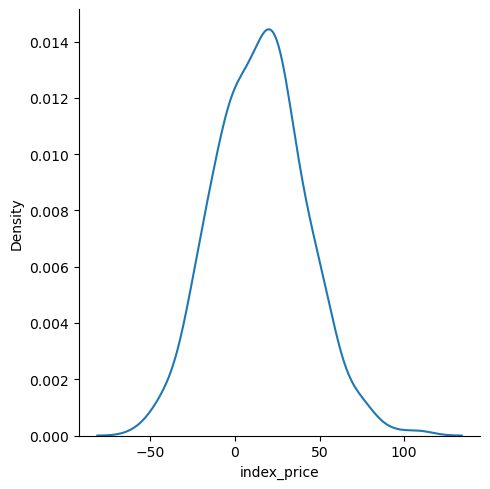

In [110]:
sns.displot(residuals, kind='kde')
plt.show()

## scatter plot with respect to prediction and residuals`

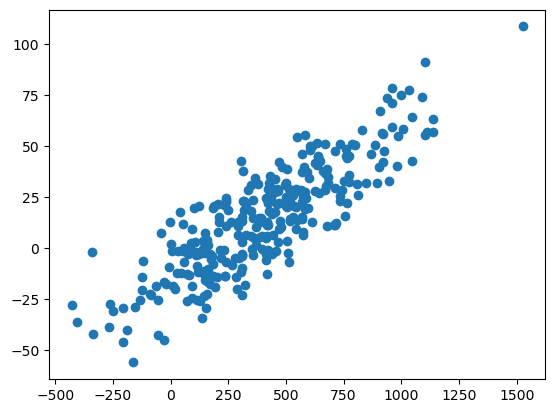

In [115]:
plt.scatter(y_pred,residuals)

In [122]:
import statsmodels.api as sm

# Add a constant (intercept) to the independent variables
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# Fit the model
model = sm.OLS(y_train, X_train_const).fit()

# Make predictions
prediction = model.predict(X_test_const)

# Print predictions
print(prediction)

[ 1.72424289e+02  3.70257283e+02  1.07727873e+02  5.42830232e+02
  5.95818685e+02  6.32918843e+02  1.13810310e+03  3.94060051e+02
  3.20496146e+02  3.57722049e+02  2.29907757e+02  7.05000485e+01
  1.37096732e+02  2.11992169e+02  5.61322237e+01  1.62169120e+02
  4.51102451e+02  1.74324556e+02  6.71218383e+02  7.71684705e+02
  1.16145967e+02  6.70840507e+02  1.61915068e+02  3.50695479e+02
  2.91379418e+02  1.49002599e+02  9.19633380e+02  3.85895369e+02
  2.37824152e+02  8.91158823e+01  3.04607211e+02  9.05070853e+02
  1.50013684e+02  5.33715736e+02  6.79254117e+02  3.62471117e+02
  3.77668135e+02  3.13791304e+02  4.65029848e+02  5.03453211e+02
 -1.23974120e+02  4.37236966e+02  1.25009612e+02  4.36601830e+01
  3.47341136e+02  1.88128770e+02  4.18624335e+02 -8.35228215e+01
  4.65849433e+02  8.45435626e+02  5.91579643e+02  5.68662856e+02
  3.07712625e+02  3.11254625e+02  4.22487422e+02  3.58864004e+02
  3.93934306e+02  3.90390385e+02  6.81030562e+02  2.50674709e+02
  9.18389375e+01  5.08326

In [124]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            index_price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.624e+07
Date:                Thu, 17 Jul 2025   Prob (F-statistic):               0.00
Time:                        19:27:08   Log-Likelihood:                -1099.3
No. Observations:                 900   AIC:                             2205.
Df Residuals:                     897   BIC:                             2219.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        403.5480      0.027   1.47e+04      0.0

In [128]:
import joblib

In [130]:
## Save the model
joblib.dump(regression, 'index_price_model.pkl')

['index_price_model.pkl']